# L01: Intro

Thomas

# L01: Modules and Classes

Morten

# L02: Cost function

$$
  \newcommand\norm[1]{{\cal L}_{#1}}
$$

## Qa Construct and print matrix $\mathbf X$ for the given rows.

In [6]:
import numpy as np

y = np.array([1,2,3,4]) # NOTE:  you'll need this later

X = np.array([[1, 2, 3], [4, 2, 1], [3, 8, 5], [-9, -1, 0]])

print('Matrix X:')
print(X)

Matrix X:
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


## Qb Create a Python implementation of norms $\norm{1}$ and $\norm{2}$.
### a) The implementations of $\norm{1}$ and $\norm{2}$ may only use 'low-level' operators. And test your implementation against a built-in function.

In [38]:
import numpy as np

def L1(vector):
    valid_types = (list, np.ndarray)
    if not isinstance(vector, valid_types):
        raise ValueError('input must be list or np.array')

    s = 0
    for i in vector:
        if isinstance(i, valid_types):
            raise ValueError('N-dimensional arrays not supported')

        s += ((i) ** 2) ** 0.5
    return s

def L2(vector):
    valid_types = (list, np.ndarray)
    if not isinstance(vector, valid_types):
        raise ValueError('input must be list or np.array')

    s = 0
    for i in vector:
        if isinstance(i, valid_types):
            raise ValueError('N-dimensional arrays not supported')
        
        s += (i ** 2)
    return s ** 0.5

tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1 = np.linalg.norm(tx-ty, ord=1)
expected_d2 = np.linalg.norm(tx-ty, ord=2)

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9
assert np.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert np.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print('OK')

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK


### b) Create a pythonic implementation of $\norm{2}$ that uses numpy's dot method.

In [40]:
def L2Dot(vector):
    if not isinstance(vector, (list, np.ndarray)):
        raise ValueError('input must be list or np.array')

    s = np.dot(vector, vector)
    return np.sqrt(s)

d2dot = L2Dot(tx-ty)
print("d2dot-expected_d2=", d2dot-expected_d2)
assert np.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 

print('OK')

d2dot-expected_d2= 0.0
OK


## Qc Implement a Root Mean Squre Error (RMSE) function and test it.

In [43]:
def RMSE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')
    
    if not isinstance(h, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    if not isinstance(y, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    return L2(h-y) * np.sqrt(1 / len(h))

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print('OK')

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


## Qd Implement a Mean Absolute (MAE) function and test it.

In [44]:
def MAE(h, y):
    if len(h) != len(y):
        raise ValueError('Vectors must be same length')
    
    if not isinstance(h, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')

    if not isinstance(y, (list, np.ndarray)):
        raise ValueError('Input must be list or np.ndarray')
    return 1 / len(h) * L1(h-y)

r = MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert np.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print('OK')

MAE=3.75, diff=0.0
OK


## Qe Add error handling to your functions.

Error handling has been added to all function checking the input type and size.

## Qf Conclusion on the ML concepts used in this exercise.

We have in this exercise worked with different norms which are used in cost functions. We have gained insights in the functions inner workings by implementing them using “low-level” operators in Python. 
<br> <br>
After implementing $\norm{1}$ and $\norm{2}$ we used them to create MAE and RMSE cost functions, this taught us about the relationship between norms and cost functions and the math behind them. This granted us insight in when to use which function in feature ML-exercises.
<br> <br>
Lastly, we tried out implementing error handling to write more robust Python code. This will help us down the road catching errors before executing code with long run time.


# L02: Dummy classifier

## Qa Load the MNIST dataset and disply a number.

Max value in X is 0 255.0
Max value in X after scaling is 0 1.0


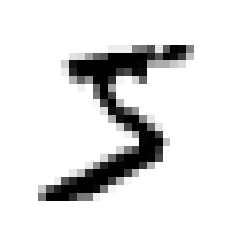

In [45]:
from sklearn.datasets import fetch_openml
from pandas import DataFrame
import numpy as np

X, y = fetch_openml('mnist_784', return_X_y=True)
if(type(X) == type(DataFrame())):
    X = X.to_numpy()
    y = y.to_numpy()
print(f"Max value in X is {0}", np.max(X))

X = X / 255
print(f"Max value in X after scaling is {0}", np.max(X))

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

MNIST_PlotDigit(X[0])

## Qb Create a Stochastic Gradient Decent Classifier
### a) Split the dataset into testing and traning sets. And train and test the model.

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

ground_true = (y == '5') 
X_train, X_test, y_train, y_test = train_test_split(X, ground_true, test_size=0.33, random_state=1)

clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(f'SGD Classifier score: {score}')

SGD Classifier score: 0.9737662337662337


### b) Plot a number that has been correctly categorized and one that has not.

Model prediction, is this the number 5?
SGD anwser: True


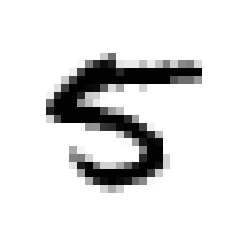

In [57]:
pred = clf.predict(X_test)

# Correct classified
MNIST_PlotDigit(X_test[3])
print(f'Model prediction, is this the number 5?\nSGD anwser: {pred[3]}')

Model prediction, is this the number 5?
SGD anwser: True


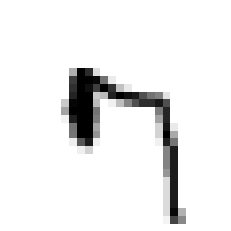

In [58]:
# Misclassified 
misclassified = np.where(y_test != pred)
MNIST_PlotDigit(X_test[misclassified[0][0]])
print(f'Model prediction, is this the number 5?\nSGD anwser: {pred[misclassified[0][0]]}')

## Qc Dummy binary classifier implementation 
### a) Create a Dummy binary classifier that inherits from BaseEstimator and ClassifierMixin from Scikit-learn.

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return [False for _ in range(len(X))]

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

### b) Compare the accuracy score to the DummyClassifier from [HOML] p. 89, how do they compare?

In [60]:
dc = DummyClassifier()
dc.fit(X_test, y_test)
s = dc.score(X_test, y_test)
print(f'DummyClassifier socre: {s}')

DummyClassifier socre: 0.9085281385281385


In [HOML] the score is between 0.907 - 0.912, which is very similar to our score. The difference can be related to the randomness when dividing the data into folds.

## Qd Conclusion Conclude the most important ML-concepts you learned in this exercise.
This exercise taught us how to import open-source datasets and splitting them in training and test folds for ML development. We were also granted insight in how to create a classifier class to use with the rest of the Scikit-learn module. 
<br> <br>
This exercise also taught us that it is important to know if your data set is skewed. Because it can lead to false hope when testing your model. This was the case when trying to create a binary classifier on the MNST dataset because it contains an even number of pictures for each number. This was the reason why our DummyClassifier god a good score by always predicting false. 



# L02: Performance metrics

Thomas

# L03: Pipelines

Morten